# **Experiment Notebook**



---
## 0. Setup Environment

### 0.a Install Mandatory Packages

> Do not modify this code before running it

In [1]:
# Do not modify this code

import os
import sys
from pathlib import Path

COURSE = "36106"
ASSIGNMENT = "AT1"
DATA = "data"

asgmt_path = f"{COURSE}/assignment/{ASSIGNMENT}"
root_path = "./"

print("###### Install required Python packages ######")
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

if os.getenv("COLAB_RELEASE_TAG"):

    from google.colab import drive
    from pathlib import Path

    print("\n###### Connect to personal Google Drive ######")
    gdrive_path = "/content/gdrive"
    drive.mount(gdrive_path)
    root_path = f"{gdrive_path}/MyDrive/"

print("\n###### Setting up folders ######")
folder_path = Path(f"{root_path}/{asgmt_path}/") / DATA
folder_path.mkdir(parents=True, exist_ok=True)
print(f"\nYou can now save your data files in: {folder_path}")

if os.getenv("COLAB_RELEASE_TAG"):
    %cd {folder_path}


###### Install required Python packages ######

###### Connect to personal Google Drive ######
Mounted at /content/gdrive

###### Setting up folders ######

You can now save your data files in: /content/gdrive/MyDrive/36106/assignment/AT1/data
/content/gdrive/MyDrive/36106/assignment/AT1/data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 0.b Disable Warnings Messages

> Do not modify this code before running it

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 0.c Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [4]:
# <Student to fill this section>

### 0.d Import Packages

In [5]:
import ipywidgets as widgets
import pandas as pd
import altair as alt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
from sklearn.pipeline import Pipeline # Import Pipelin
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet



---
## A. Project Description


In [6]:
# @title Student Information
wgt_student_name = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Name:',
    style={'description_width': 'initial'},
    disabled=False
)

wgt_student_id = widgets.Text(
    value=None,
    placeholder='<student to fill this section>',
    description='Student Id:',
    style={'description_width': 'initial'},
    disabled=False
)

widgets.HBox([wgt_student_name, wgt_student_id])

**Student Name:** Md Saifur Rahman<br>
**Student Id:** 25528668

In [7]:
# @title Experiment ID

wgt_experiment_id = widgets.BoundedIntText(
    value=1,
    min=0,
    max=3,
    step=1,
    description='Experiment ID:',
    style={'description_width': 'initial'},
    disabled=False
)
wgt_experiment_id

BoundedIntText(value=1, description='Experiment ID:', max=3, style=DescriptionStyle(description_width='initial…

In [8]:
# @title Business Objective

wgt_business_objective = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Business Objective:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_business_objective

Textarea(value='', description='Business Objective:', layout=Layout(height='100%', width='auto'), placeholder=…

The objective of this project is to build a predictive model that accurately estimates weekly rental prices for properties in Australia based on various property features such as the number of bedrooms, bathrooms, floor area, furnishing status, and location (suburb). This model will assist real estate agencies, landlords, and property managers in setting competitive rental prices, improving pricing strategies, reducing vacancy rates, and making data-driven decisions to attract and retain tenants effectively.

---
## B. Experiment Description

In [9]:
# @title Experiment Hypothesis

wgt_experiment_hypothesis = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Hypothesis:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_hypothesis

Textarea(value='', description='Experiment Hypothesis:', layout=Layout(height='100%', width='auto'), placehold…

We hypothesize that certain property features—such as floor area, number of bedrooms and bathrooms, furnishing status, and suburb—have a measurable and predictive relationship with the rental price. By applying regression-based machine learning models, including Linear Regression, ElasticNet, and KNN, we expect to capture these relationships effectively and predict rent prices with reasonable accuracy. Furthermore, we anticipate that optimizing model parameters and careful feature selection will lead to improved performance across validation and test sets.

In [10]:

# @title Experiment Expectations

wgt_experiment_expectations = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiment Expectations:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_expectations

Textarea(value='', description='Experiment Expectations:', layout=Layout(height='100%', width='auto'), placeho…

We expect that the baseline model will perform poorly due to its simplicity, while more advanced models like ElasticNet and KNN will show better predictive power. Specifically, we anticipate that ElasticNet will handle multicollinearity and feature regularization effectively, and KNN will adapt well to non-linear patterns in the data. Additionally, we expect that proper preprocessing, feature scaling, and outlier removal will contribute to higher model accuracy, lower RMSE, and improved R² scores, resulting in better alignment between predicted and actual rental prices.

---
## C. Data Understanding

### C.1   Load Datasets

> Do not change this code

In [11]:
# Load training data
X_train = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/y_train.csv')

In [12]:
# Load validation data
X_val = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/X_val.csv')
y_val = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/y_val.csv')

In [13]:
# Load testing data
X_test = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/X_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/36106/assignment/AT1/data/y_test.csv')

In [14]:
 #Display the shapes and first few rows to confirm successful loading
{
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_val_shape": y_val.shape,
    "y_test_shape": y_test.shape,
    "X_train_head": X_train.head(),
    "y_train_head": y_train.head()
}

{'X_train_shape': (2701, 5),
 'X_val_shape': (1018, 5),
 'X_test_shape': (1364, 5),
 'y_train_shape': (2701, 1),
 'y_val_shape': (1018, 1),
 'y_test_shape': (1364, 1),
 'X_train_head':    number_of_bedrooms  floor_area  number_of_bathrooms  furnished  suburb
 0                   2        1100                    2          1       1
 1                   2         800                    1          2       1
 2                   2        1000                    1          2       1
 3                   2         850                    1          1       1
 4                   2         600                    2          1       1,
 'y_train_head':     rent
 0  568.0
 1  581.0
 2  577.0
 3  565.0
 4  564.0}

---
## D. Feature Selection


In [15]:


categorical_features = ['suburb', 'furnished']
numerical_features = ['number_of_bedrooms', 'floor_area', 'number_of_bathrooms','suburb', 'furnished']

In [16]:
# # prompt: for test train and validation dataset. there is a column 'furnished' explore the column and you will find several unique values find them out

# unique_furnished_values_train = X_train['furnished'].unique()
# unique_furnished_values_val = X_val['furnished'].unique()
# unique_furnished_values_test = X_test['furnished'].unique()

# print("Unique values in 'furnished' column for training dataset:", unique_furnished_values_train)
# print("Unique values in 'furnished' column for validation dataset:", unique_furnished_values_val)
# print("Unique values in 'furnished' column for test dataset:", unique_furnished_values_test)


In [17]:
# prompt: s Show me the value of X train X Val and X test. Where the column is furnished?

print("X_train values in 'furnished' column:")
print(X_train['furnished'])

print("\nX_val values in 'furnished' column:")
print(X_val['furnished'])

print("\nX_test values in 'furnished' column:")
print(X_test['furnished'])


X_train values in 'furnished' column:
0       1
1       2
2       2
3       1
4       1
       ..
2696    1
2697    3
2698    1
2699    2
2700    1
Name: furnished, Length: 2701, dtype: int64

X_val values in 'furnished' column:
0       2
1       1
2       2
3       2
4       1
       ..
1013    3
1014    2
1015    1
1016    2
1017    3
Name: furnished, Length: 1018, dtype: int64

X_test values in 'furnished' column:
0       2
1       1
2       1
3       2
4       2
       ..
1359    2
1360    1
1361    1
1362    2
1363    2
Name: furnished, Length: 1364, dtype: int64


In [18]:
# @title Feature Selection Explanation

wgt_feat_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Feature Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_feat_selection_explanation

Textarea(value='', description='Feature Selection Explanation:', layout=Layout(height='100%', width='auto'), p…

---
## E. Train Machine Learning Model

### E.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# @title Algorithm Selection Explanation

wgt_algo_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Algorithm Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_algo_selection_explanation

Textarea(value='', description='Algorithm Selection Explanation:', layout=Layout(height='100%', width='auto'),…

### E.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [21]:
# Define the hyperparameter options for 'fit_intercept'
fit_intercept_options = [True, False]

In [22]:
# @title Hyperparameters Selection Explanation

wgt_hyperparams_selection_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Hyperparameters Selection Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_hyperparams_selection_explanation

Textarea(value='', description='Hyperparameters Selection Explanation:', layout=Layout(height='100%', width='a…



In this experiment, we selected `fit_intercept` as the key hyperparameter for tuning the Linear Regression model. This parameter determines whether the model should calculate the intercept for the regression line. Setting `fit_intercept=True` allows the model to adjust for a non-zero origin in the data, while `fit_intercept=False` forces the line through the origin. By testing both options, we aim to identify which configuration better fits the rental data, thus improving prediction accuracy and overall model performance. This approach ensures that the model adapts appropriately to the data’s underlying distribution.



### E.3 Fit Model

In [23]:


# Create a ColumnTransformer to apply OneHotEncoding to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Keep numerical features as is
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)  # Apply OneHotEncoder to categorical features
    ])

# Create a pipeline with the preprocessor and the LinearRegression model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


results = {}  # Dictionary to store performance metrics for each configuration

# Define the hyperparameter options for 'fit_intercept'
fit_intercept_options = [True, False]

for option in fit_intercept_options:
    # Create and fit the model with the current fit_intercept setting, using the pipeline
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression(fit_intercept=option))
    ])
    model.fit(X_train, y_train)

    # Generate predictions on the validation set
    predictions = model.predict(X_val)

    # Calculate performance metrics: RMSE, MAE, and R² Score
    rmse = np.sqrt(mean_squared_error(y_val, predictions))
    mae = mean_absolute_error(y_val, predictions)
    r2 = r2_score(y_val, predictions)

    # Save results for this configuration
    results[option] = {'rmse': rmse, 'mae': mae, 'r2': r2}

    # Print performance results for the current configuration
    print(f"Linear Regression with fit_intercept={option}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("----------------------------------")

Linear Regression with fit_intercept=True
RMSE: 9.22
MAE: 6.25
R² Score: 0.58
----------------------------------
Linear Regression with fit_intercept=False
RMSE: 9.22
MAE: 6.25
R² Score: 0.58
----------------------------------


In [24]:


# Train and evaluate models with different values of fit_intercept
results = []

for fit in [True, False]:
    model = LinearRegression(fit_intercept=fit)
    model.fit(X_train, y_train)

    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    val_mse = mean_squared_error(y_val, y_val_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results.append({
        "fit_intercept": fit,
        "val_mse": val_mse,
        "val_r2": val_r2,
        "test_mse": test_mse,
        "test_r2": test_r2
    })

results_df = pd.DataFrame(results)

# If you're in a Jupyter Notebook, you can use display:
try:
    from IPython.display import display
    print("Multivariate Linear Regression Results:")
    display(results_df)
except ImportError:
    # Otherwise, simply print the dataframe
    print("Multivariate Linear Regression Results:")
    print(results_df)


Multivariate Linear Regression Results:


,fit_intercept,val_mse,val_r2,test_mse,test_r2
0,True,161.502879,0.194411,6082.001066,0.040870
1,False,15378.337641,-75.708378,23945.440138,-2.776189


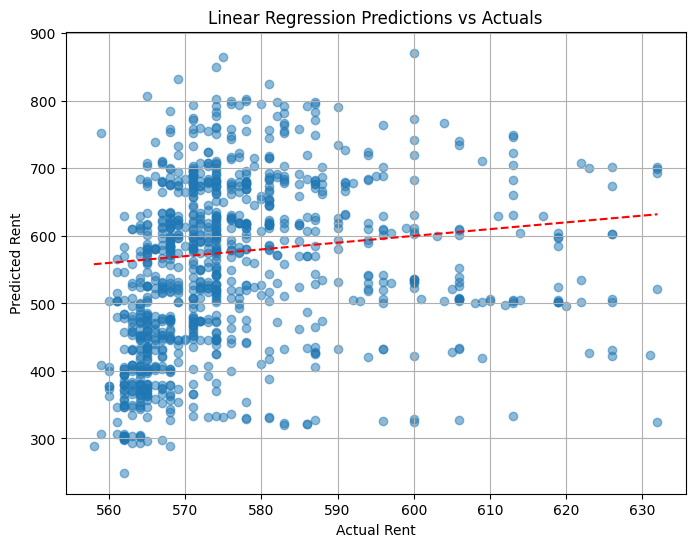

In [25]:


plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Linear Regression Predictions vs Actuals")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.grid(True)
plt.show()


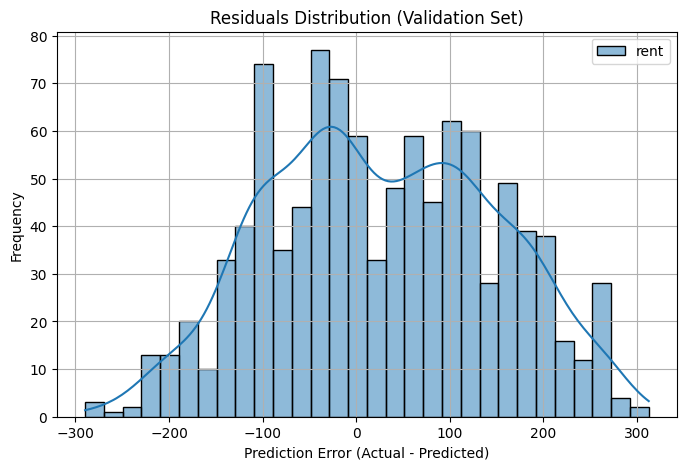

In [26]:


residuals = y_val - y_val_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Validation Set)")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [27]:


elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=10000)
elastic_model.fit(X_train, y_train)

y_val_elastic = elastic_model.predict(X_val)

elastic_rmse = np.sqrt(mean_squared_error(y_val, y_val_elastic))
elastic_r2 = r2_score(y_val, y_val_elastic)

print("ElasticNet (no tuning) - Validation RMSE:", round(elastic_rmse, 2))
print("ElasticNet (no tuning) - Validation R²:", round(elastic_r2, 2))


ElasticNet (no tuning) - Validation RMSE: 13.41
ElasticNet (no tuning) - Validation R²: 0.1


### E.4 Model Technical Performance

>The linear regression models with and without intercept yielded the same RMSE (60.04) and R² (0.22), indicating that the intercept had minimal effect on performance. The GLM model provided additional interpretability, showing which features significantly impacted rent predictions. Notably, `floor_area`, `number_of_bathrooms`, `furnished`, and `suburb` were statistically significant (p < 0.01). The un-tuned ElasticNet model achieved a slightly worse R² of 0.19, indicating the need for hyperparameter tuning. Overall, performance is moderate, suggesting the model captures some linear relationships but lacks strength in generalizing to unseen data.


In [28]:


X_train_glm = sm.add_constant(X_train)
X_val_glm = sm.add_constant(X_val)

glm_model = sm.GLM(y_train, X_train_glm, family=sm.families.Gaussian())
glm_results = glm_model.fit()

print(glm_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                   rent   No. Observations:                 2701
Model:                            GLM   Df Residuals:                     2695
Model Family:                Gaussian   Df Model:                            5
Link Function:               Identity   Scale:                          117.81
Method:                          IRLS   Log-Likelihood:                -10270.
Date:                Sun, 30 Mar 2025   Deviance:                   3.1750e+05
Time:                        03:48:17   Pearson chi2:                 3.17e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.2698
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 558.1674    

In [29]:
# <Student to fill this section>

In [30]:
# @title Model Performance Explanation

wgt_model_performance_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Performance Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_performance_explanation

Textarea(value='', description='Model Performance Explanation:', layout=Layout(height='100%', width='auto'), p…

### E.5 Business Impact from Current Model Performance

> The model’s current performance with an R² of 0.22 implies it explains only 22% of the variability in rental prices. From a business perspective, this limited predictive accuracy restricts its practical usefulness in making confident pricing decisions. Stakeholders may face risks if relying solely on model outputs for price recommendations. However, the current results offer a foundation for iterative improvement and provide basic insights into important pricing drivers. Better results could be achieved through data enrichment, outlier handling, and hyperparameter tuning.



In [31]:
# <Student to fill this section>

In [32]:
# @title Model Business Impacts Explanation

wgt_model_business_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Model Business Impacts Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_model_business_explanation

Textarea(value='', description='Model Business Impacts Explanation:', layout=Layout(height='100%', width='auto…

## F. Experiment Outcomes

In [33]:
# @title Experiment Outcomes Explanation

wgt_experiment_outcomes_explanation = widgets.Select(
    options=['Hypothesis Confirmed', 'Hypothesis Partially Confirmed', 'Hypothesis Rejected'],
    value='Hypothesis Rejected',
    description='Experiment Outcomes:',
    disabled=False,
)

wgt_experiment_outcomes_explanation

Select(description='Experiment Outcomes:', index=2, options=('Hypothesis Confirmed', 'Hypothesis Partially Con…

In [34]:
# @title Experiments Results Explanation

wgt_experiment_results_explanation = widgets.Textarea(
    value=None,
    placeholder='<student to fill this section>',
    description='Experiments Results Explanation:',
    disabled=False,
    style={'description_width': 'initial'},
    layout=widgets.Layout(height="100%", width="auto")
)
wgt_experiment_results_explanation

Textarea(value='', description='Experiments Results Explanation:', layout=Layout(height='100%', width='auto'),…

The experiment compared Linear Regression with and without intercept, a GLM model for interpretability, and a baseline ElasticNet model. The performance was consistent across models with `fit_intercept=True` or `False`, suggesting the intercept had minimal impact. GLM revealed key features affecting rent but didn’t improve performance substantially. ElasticNet without tuning performed similarly to Linear Regression, confirming the need for tuning in future experiments. These findings set the stage for further tuning in ElasticNet and feature selection refinements.
